# San Francisco Housing Rental Analysis

In this assignment, you will perform basic analysis for the San Francisco Housing Market to allow potential real estate investors to choose rental investment properties. 

In [82]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas
from pathlib import Path
from dotenv import load_dotenv

%matplotlib inline

import panel as pn
from panel.interact import interact

In [83]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")

## Load Data

In [84]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function. 

Hint: Use the Pandas groupby function

Optional challenge: Use the min, max, and std to scale the y limits of the chart.

In [85]:
# Calculate the mean number of housing units per year (hint: use groupby) 
housing_units = sfo_data.groupby('year')['housing_units'].mean()
print(housing_units)

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64


[(367500, 387500), Text(0, 0.5, 'Housing Units'), Text(0.5, 0, 'Year')]

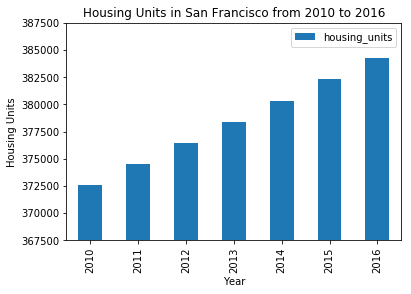

In [86]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
housing_units_year = housing_units.to_frame()
housing_units_year.reset_index(inplace=True)
housing_units_year.plot.bar(
    x="year", 
    y="housing_units", 
    rot=90, 
    title='Housing Units in San Francisco from 2010 to 2016'
    ).set(
        xlabel='Year', ylabel='Housing Units', ylim=(367500,387500)
        )

In [87]:
# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
# YOUR CODE HERE!

#fig_housing_units = plt.figure(figsize = (10, 5)) 

#plt.show()
#plt.close(fig_housing_units)

- - - 

## Average Prices per Square Foot

In this section, you will calculate the average gross rent and average sales price for each year. Plot the results as a line chart.

### Average Gross Rent in San Francisco Per Year

In [88]:
# Calculate the average gross rent and average sale price per square foot

# Get slice of dataframe of only year, gross rent and sale price per square foot
grossrent_salesprice = sfo_data.loc[:, ['sale_price_sqr_foot', 'gross_rent']]

# Calculate average gross rent and sales price for dataframe grossrent_salesprice
avg_grossrent_salesprice = grossrent_salesprice.groupby('year').mean()
avg_grossrent_salesprice

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239
2011,341.903429,1530
2012,399.389968,2324
2013,483.600304,2971
2014,556.277273,3528
2015,632.540352,3739
2016,697.643709,4390


[Text(0, 0.5, 'Gross Rent'), Text(0.5, 0, 'Year')]

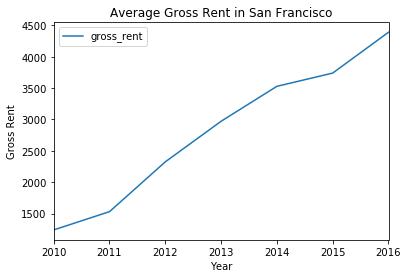

In [89]:
# Plot the Average Gross Rent per Year as a Line Chart 
avg_grossrent_salesprice.reset_index(inplace=True)
avg_grossrent_salesprice.plot.line(
    x='year', 
    y='gross_rent',
    title='Average Gross Rent in San Francisco'
    ).set(
        xlabel='Year', ylabel='Gross Rent'
        )

### Average Sales Price per Year

[Text(0, 0.5, 'Avg. Sale Price'), Text(0.5, 0, 'Year')]

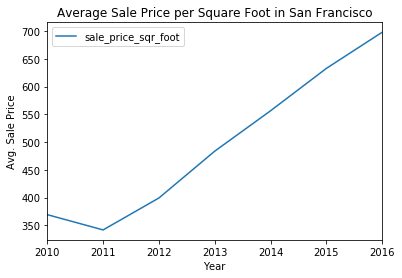

In [90]:
# Plot the Average Sales Price per Year as a line chart
# YOUR CODE HERE!
avg_grossrent_salesprice.plot.line(
    x='year', 
    y='sale_price_sqr_foot',
    title='Average Sale Price per Square Foot in San Francisco'
    ).set(
        xlabel='Year', ylabel='Avg. Sale Price'
        )

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create an interactive visulization of the Average Prices with a dropdown selector for the neighborhood.

Hint: It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [91]:
# Group by year and neighborhood and then create a new dataframe of the mean values
neighborhood_prices = sfo_data.copy()
avg_neighborhood_prices = neighborhood_prices.groupby(['year', 'neighborhood']).mean()
avg_neighborhood_prices
avg_neighborhood_prices.reset_index(inplace=True)
avg_neighborhood_prices.head(10)

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239
5,2010,Central Sunset,418.172493,372560,1239
6,2010,Corona Heights,369.359338,372560,1239
7,2010,Cow Hollow,569.379968,372560,1239
8,2010,Croker Amazon,165.645730,372560,1239
9,2010,Diamond Heights,456.930822,372560,1239


In [92]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood

# Enable Jupyter Lab panel plugin
pn.extension()

# Define function to choose a neighborhood and return the line plot
def choose_neighborhood(neighborhood):

    # set avg_neighborhood accessible as global within this function
    global avg_neighborhood_prices
    
    # create dataframe [neighborhood_df] with rows of only the selected neighborhood from drop down 
    neighborhood_df = avg_neighborhood_prices[avg_neighborhood_prices["neighborhood"] == neighborhood]

    plot_title = "neighborhood:" + ' ' + neighborhood
    
    # Plot neighborhood dataframe as line plot
    return neighborhood_df.hvplot.line(
        x="year",
        y="sale_price_sqr_foot",
        xlabel="Year",
        ylabel="Avg. Sale Price per Square Foot",
        colormap="viridis",
        title=plot_title,
     )

list_of_neighborhoods = avg_neighborhood_prices.neighborhood.unique().tolist()
interact(choose_neighborhood, neighborhood=list_of_neighborhoods)

Column
    [0] Column
        [0] Select(name='neighborhood', options=['Alamo Square', ...], value='Alamo Square')
    [1] Row
        [0] HoloViews(Curve, name='interactive02804')

- - - 

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [93]:
# Getting the data from the top 10 expensive neighborhoods
neighborhood_all_years_prices = neighborhood_prices.loc[:, ['neighborhood', 'sale_price_sqr_foot', 'housing_units', 'gross_rent']]

avg_neighborhood_all_years_prices = neighborhood_all_years_prices.groupby('neighborhood').mean()

top_10_expensive_neighborhood = avg_neighborhood_all_years_prices.nlargest(10, 'sale_price_sqr_foot')
avg_neighborhood_all_years_prices.reset_index(inplace=True)

top_10_expensive_neighborhood.reset_index(inplace=True)
top_10_expensive_neighborhood

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Union Square District,903.993258,377427.50,2555.166667
1,Merced Heights,788.844818,380348.00,3414.000000
2,Miraloma Park,779.810842,375967.25,2155.250000
3,Pacific Heights,689.555817,378401.00,2817.285714
4,Westwood Park,687.087575,382295.00,3959.000000
5,Telegraph Hill,676.506578,378401.00,2817.285714
6,Presidio Heights,675.350212,378401.00,2817.285714
7,Cow Hollow,665.964042,378401.00,2817.285714
8,Potrero Hill,662.013613,378401.00,2817.285714
9,South Beach,650.124479,375805.00,2099.000000


In [94]:
# Plotting the data from the top 10 expensive neighborhoods

top_10_expensive_neighborhood.hvplot.bar(
    x="neighborhood", 
    y="sale_price_sqr_foot", 
    rot=90, 
    title='Top 10 Expensive Neighborhoods in SFO',
    xlabel='Neighborhood', 
    ylabel='Avg. Sale Price per Square Foot',
    frame_height=200,
    frame_width=600,
    )

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Parallel Coordinates and Parallel Categories Analysis

In this section, you will use plotly express to create parallel coordinates and parallel categories visualizations so that investors can interactively filter and explore various factors related to the sales price of the neighborhoods. 

Using the DataFrame of Average values per neighborhood (calculated above), create the following visualizations:
1. Create a Parallel Coordinates Plot
2. Create a Parallel Categories Plot

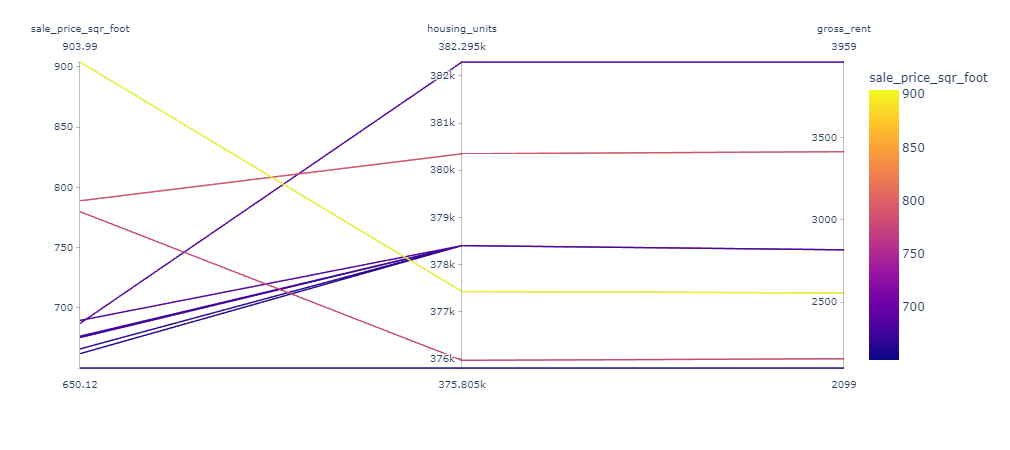

In [95]:
# Parallel Coordinates Plot

px.parallel_coordinates(top_10_expensive_neighborhood, color='sale_price_sqr_foot')

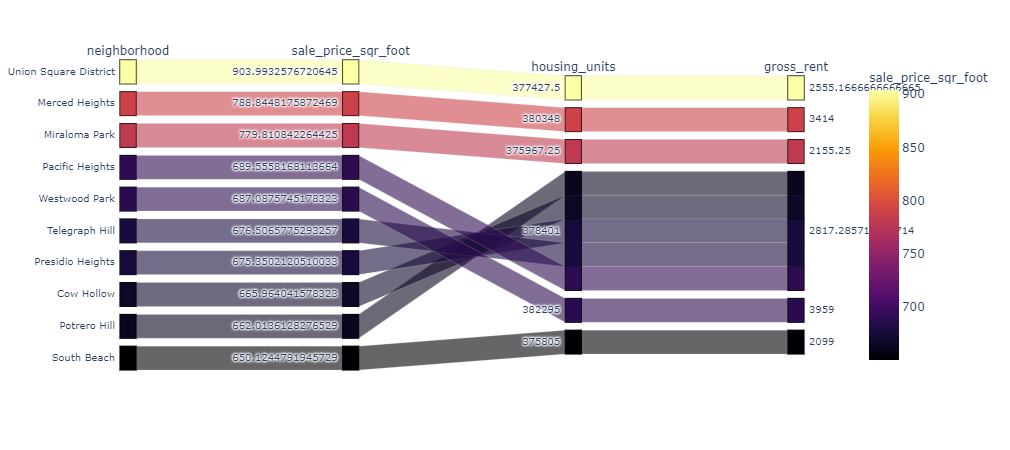

In [96]:
# Parallel Categories Plot
px.parallel_categories(
    top_10_expensive_neighborhood,
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
)

- - - 

## Neighborhood Map

In this section, you will read in neighboor location data and build an interactive map with the average prices per neighborhood. Use a scatter_mapbox from plotly express to create the visualization. Remember, you will need your mapbox api key for this.

### Load Location Data

In [97]:
# Load neighborhoods coordinates data
file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
df_neighborhood_locations.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean prices per neighborhood

1. Calculate the mean values for each neighborhood
2. Join the average values with the neighborhood locations

In [98]:
# Calculate the mean values for each neighborhood
avg_neighborhood_all_years_prices.rename(columns={'neighborhood':'Neighborhood'}, inplace=True)
avg_neighborhood_all_years_prices.head()

,Neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,576.746488,379374.5,3080.333333


In [99]:
# Join the average values with the neighborhood locations

neighborhood_sales_loc = pd.merge(df_neighborhood_locations, avg_neighborhood_all_years_prices, 
                                  on='Neighborhood',
                                  #axis=1, 
                                  #join='inner',
                                  )

neighborhood_sales_loc.head()

,Neighborhood,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,366.020712,378401.0,2817.285714
1,Anza Vista,37.779598,-122.443451,373.382198,379050.0,3031.833333
2,Bayview,37.734670,-122.401060,204.588623,376454.0,2318.400000
3,Bayview Heights,37.728740,-122.410980,590.792839,382295.0,3739.000000
4,Buena Vista Park,37.768160,-122.439330,452.680591,378076.5,2698.833333


### Mapbox Visualization

Plot the aveage values per neighborhood with a plotly express scatter_mapbox visualization.

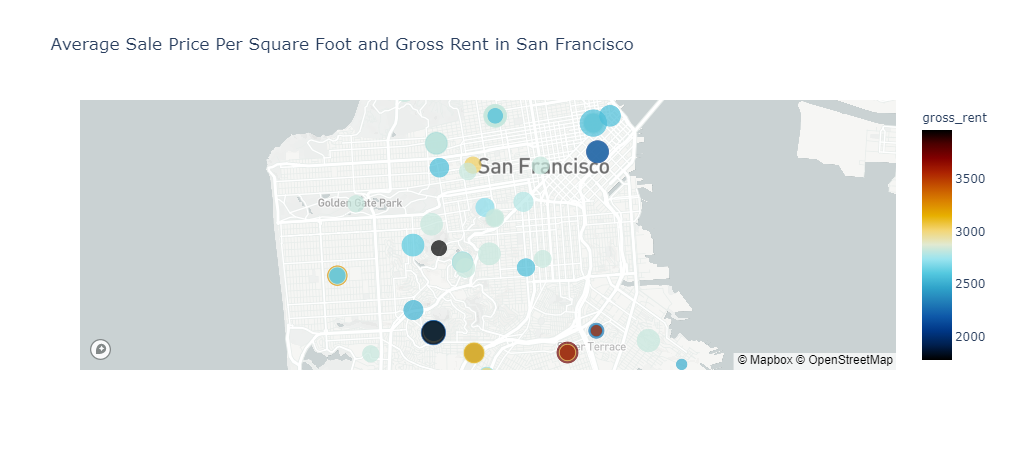

In [100]:
# Create a scatter mapbox to analyze neighborhood info

# Set token using Plotly Express set function
px.set_mapbox_access_token(mapbox_token)

def get_neighborhood_plot():
    neighborhood_plot = px.scatter_mapbox(
        neighborhood_sales_loc,
        lat="Lat",
        lon="Lon",
        size="sale_price_sqr_foot",
        hover_name="Neighborhood",
        color="gross_rent",
        color_continuous_scale=px.colors.cyclical.IceFire,
        title="Average Sale Price Per Square Foot and Gross Rent in San Francisco",
        zoom=11,
        width=1000,
    )
    return neighborhood_plot

get_neighborhood_plot()